In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
astro = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,Tuesday,Ashwini,NaN,NaN,NaN,3.0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,Tuesday,Bharani,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,Tuesday,Krittika,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,Tuesday,Rohini,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,Tuesday,Mrigashirsha,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [3]:
astro.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [4]:
astro["Pada-1"] = astro["Pada-1"].astype(dtype='int32')
astro["Pada-2"] = astro["Pada-2"].astype(dtype='int32')
astro["Pada-3"] = astro["Pada-3"].astype(dtype='int32')
astro["Pada-4"] = astro["Pada-4"].astype(dtype='int32')

In [5]:
encoding = LabelEncoder()
astro["Day"] = encoding.fit_transform(astro["Day"])
astro["Nakshatra"] = encoding.fit_transform(astro["Nakshatra"])

In [6]:
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [7]:
astro_train = astro[astro['Data'] == 'Train']
astro_test = astro[astro['Data'] == 'Test']

In [8]:
astro_train.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [9]:
astro_train.drop(labels='Data', axis=1, inplace=True)

In [10]:
astro_train.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,1,3,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,1,4,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,1,9,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,1,19,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,1,11,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [11]:
astro_test.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
966,Test,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
967,Test,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
968,Test,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
969,Test,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
970,Test,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [12]:
astro_test.drop(labels='Data', axis=1, inplace=True)

In [13]:
astro_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
966,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
967,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
968,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
969,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
970,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [14]:
astro_train.shape, astro_test.shape

((993, 14), (527, 14))

In [15]:
astro_train["Winning Numbers"][0]

'7 15 18 46 49 10 12'

In [16]:
# Converting string of numbers to a numpy array

for i in range(966):
    astro_train["Winning Numbers"][i] = np.fromstring(astro_train["Winning Numbers"][i], sep=" ", dtype='int32')

In [17]:
astro_train["Winning Numbers"][0]

array([ 7, 15, 18, 46, 49, 10, 12])

In [18]:
astro_train.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,1,3,0,0,0,3,7,15,18,46,49,10,12,"[7, 15, 18, 46, 49, 10, 12]"
1,1,4,0,0,0,0,7,15,18,46,49,10,12,"[7, 15, 18, 46, 49, 10, 12]"
2,1,9,0,0,0,0,7,15,18,46,49,10,12,"[7, 15, 18, 46, 49, 10, 12]"
3,1,19,0,0,0,0,7,15,18,46,49,10,12,"[7, 15, 18, 46, 49, 10, 12]"
4,1,11,0,0,0,0,7,15,18,46,49,10,12,"[7, 15, 18, 46, 49, 10, 12]"


In [19]:
astro_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
966,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
967,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
968,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
969,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
970,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [20]:
astro_test["Winning Numbers"][966]

'6 9 10 30 49 3 4'

In [21]:
astro_test.reset_index(inplace=True, drop=True)

In [22]:
astro_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,0,3,0,0,0,6,6,9,10,30,49,3,4,6 9 10 30 49 3 4
1,0,4,0,1,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
2,0,9,0,3,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
3,0,19,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4
4,0,11,0,0,0,0,6,9,10,30,49,3,4,6 9 10 30 49 3 4


In [23]:
astro_test["Winning Numbers"][0]

'6 9 10 30 49 3 4'

In [24]:
# Converting string of numbers to a numpy array

for i in range(527):
    astro_test["Winning Numbers"][i] = np.fromstring(astro_test["Winning Numbers"][i], sep=" ", dtype='int32')

In [25]:
astro_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,0,3,0,0,0,6,6,9,10,30,49,3,4,"[6, 9, 10, 30, 49, 3, 4]"
1,0,4,0,1,0,0,6,9,10,30,49,3,4,"[6, 9, 10, 30, 49, 3, 4]"
2,0,9,0,3,0,0,6,9,10,30,49,3,4,"[6, 9, 10, 30, 49, 3, 4]"
3,0,19,0,0,0,0,6,9,10,30,49,3,4,"[6, 9, 10, 30, 49, 3, 4]"
4,0,11,0,0,0,0,6,9,10,30,49,3,4,"[6, 9, 10, 30, 49, 3, 4]"


In [26]:
y_train = astro_train[["1st Num","2nd Num","3rd Num","4th Num","5th Num","1st Lucky Star","2nd Lucky Star"]]
y_train.head()

,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,7,15,18,46,49,10,12
1,7,15,18,46,49,10,12
2,7,15,18,46,49,10,12
3,7,15,18,46,49,10,12
4,7,15,18,46,49,10,12


In [27]:
scaler = StandardScaler().fit(y_train.values)
y_train_transformed = scaler.transform(y_train.values)
y_train_scaled = pd.DataFrame(data=y_train_transformed, index=y_train.index)

In [28]:
y_train_scaled.shape

(993, 7)

In [29]:
X_train = astro_train[["Day","Nakshatra","Pada-1","Pada-2","Pada-3","Pada-4"]]
X_train.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4
0,1,3,0,0,0,3
1,1,4,0,0,0,0
2,1,9,0,0,0,0
3,1,19,0,0,0,0
4,1,11,0,0,0,0


In [30]:
scaler = StandardScaler().fit(X_train.values)
X_train_transformed = scaler.transform(X_train.values)
X_train_scaled = pd.DataFrame(data=X_train_transformed, index=X_train.index)

In [31]:
X_train_scaled.head()

,0,1,2,3,4,5
0,0.947978,-1.299411,-0.255879,-0.272398,-0.238277,1.492186
1,0.947978,-1.170431,-0.255879,-0.272398,-0.238277,-0.283063
2,0.947978,-0.525531,-0.255879,-0.272398,-0.238277,-0.283063
3,0.947978,0.764268,-0.255879,-0.272398,-0.238277,-0.283063
4,0.947978,-0.267572,-0.255879,-0.272398,-0.238277,-0.283063


In [32]:
X_train_scaled.shape

(993, 6)

In [33]:
y_test = astro_test[["1st Num","2nd Num","3rd Num","4th Num","5th Num","1st Lucky Star","2nd Lucky Star"]]
y_test.head()

,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,6,9,10,30,49,3,4
1,6,9,10,30,49,3,4
2,6,9,10,30,49,3,4
3,6,9,10,30,49,3,4
4,6,9,10,30,49,3,4


In [34]:
scaler = StandardScaler().fit(y_test.values)
y_test_transformed = scaler.transform(y_test.values)
y_test_scaled = pd.DataFrame(data=y_test_transformed, index=y_test.index)

In [35]:
y_test_scaled.head()

,0,1,2,3,4,5,6
0,-0.48962,-0.687194,-1.335704,-0.163256,0.934328,-0.397295,-1.678523
1,-0.48962,-0.687194,-1.335704,-0.163256,0.934328,-0.397295,-1.678523
2,-0.48962,-0.687194,-1.335704,-0.163256,0.934328,-0.397295,-1.678523
3,-0.48962,-0.687194,-1.335704,-0.163256,0.934328,-0.397295,-1.678523
4,-0.48962,-0.687194,-1.335704,-0.163256,0.934328,-0.397295,-1.678523


In [36]:
y_test_scaled.shape

(527, 7)

In [37]:
X_test = astro_test[["Day","Nakshatra","Pada-1","Pada-2","Pada-3","Pada-4"]]
X_test.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4
0,0,3,0,0,0,6
1,0,4,0,1,0,0
2,0,9,0,3,0,0
3,0,19,0,0,0,0
4,0,11,0,0,0,0


In [38]:
scaler = StandardScaler().fit(X_test.values)
X_test_transformed = scaler.transform(X_test.values)
X_test_scaled = pd.DataFrame(data=X_test_transformed, index=X_test.index)

In [39]:
X_test_scaled.head()

,0,1,2,3,4,5
0,-0.950014,-1.289071,-0.264237,-0.303522,-0.257065,4.021985
1,-0.950014,-1.159649,-0.264237,0.244272,-0.257065,-0.227102
2,-0.950014,-0.512534,-0.264237,1.339860,-0.257065,-0.227102
3,-0.950014,0.781694,-0.264237,-0.303522,-0.257065,-0.227102
4,-0.950014,-0.253688,-0.264237,-0.303522,-0.257065,-0.227102


In [40]:
X_test_scaled.shape

(527, 6)

In [41]:
X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test_scaled.shape

((993, 6), (993, 7), (527, 6), (527, 7))

In [43]:
X_tr_scaled_nmpy = np.array(X_train_scaled.values)
X_tr_scaled_nmpy=np.reshape(X_tr_scaled_nmpy,(993,6,1))
print(X_tr_scaled_nmpy.shape)
X_tr_scaled_nmpy

(993, 6, 1)


array([[[ 0.94797762],
        [-1.29941089],
        [-0.2558789 ],
        [-0.27239801],
        [-0.23827664],
        [ 1.49218644]],

       [[ 0.94797762],
        [-1.17043098],
        [-0.2558789 ],
        [-0.27239801],
        [-0.23827664],
        [-0.28306252]],

       [[ 0.94797762],
        [-0.52553144],
        [-0.2558789 ],
        [-0.27239801],
        [-0.23827664],
        [-0.28306252]],

       ...,

       [[ 0.94797762],
        [ 0.24834802],
        [-0.2558789 ],
        [ 5.04438277],
        [-0.23827664],
        [-0.28306252]],

       [[ 0.94797762],
        [ 1.40916721],
        [-0.2558789 ],
        [-0.27239801],
        [-0.23827664],
        [ 2.08393609]],

       [[ 0.94797762],
        [ 0.63528775],
        [-0.2558789 ],
        [-0.27239801],
        [-0.23827664],
        [-0.28306252]]])

In [44]:
X_tr_scaled_nmpy[0]

array([[ 0.94797762],
       [-1.29941089],
       [-0.2558789 ],
       [-0.27239801],
       [-0.23827664],
       [ 1.49218644]])

In [45]:
y_train_scaled.loc[0]

0   -0.394485
1   -0.161386
2   -0.633665
3    1.467704
4    0.878380
5    2.064449
6    1.129424
Name: 0, dtype: float64

In [47]:
y_tr_scaled_nmpy = np.array(y_train_scaled.values)
y_tr_scaled_nmpy=np.reshape(y_tr_scaled_nmpy,(993,7))
print(y_tr_scaled_nmpy.shape)
y_tr_scaled_nmpy

(993, 7)


array([[-0.39448516, -0.16138552, -0.63366539, ...,  0.87837959,
         2.06444864,  1.12942383],
       [-0.39448516, -0.16138552, -0.63366539, ...,  0.87837959,
         2.06444864,  1.12942383],
       [-0.39448516, -0.16138552, -0.63366539, ...,  0.87837959,
         2.06444864,  1.12942383],
       ...,
       [-0.53064219, -0.16138552, -0.52703436, ..., -0.45796319,
         0.97325054,  0.8084399 ],
       [-0.53064219, -0.16138552, -0.52703436, ..., -0.45796319,
         0.97325054,  0.8084399 ],
       [-0.53064219, -0.16138552, -0.52703436, ..., -0.45796319,
         0.97325054,  0.8084399 ]])

In [48]:
y_tr_scaled_nmpy[0]

array([-0.39448516, -0.16138552, -0.63366539,  1.46770355,  0.87837959,
        2.06444864,  1.12942383])

In [63]:
model = Sequential()

model.add(Flatten(input_shape=(6,1)))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1200))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1600))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(2400))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(7))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1200)                │         961,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1600)                │       1,921,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2400)                │       3,842,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │          16,807 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 7)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,144,607 (27.25 MB)

 Trainable params: 7,144,607 (27.25 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [65]:
model.fit(X_tr_scaled_nmpy, y_tr_scaled_nmpy, batch_size=128, epochs=300, validation_split=0.2)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.1760 - loss: 1.0598 - val_accuracy: 0.1357 - val_loss: 0.9844
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2785 - loss: 1.0526 - val_accuracy: 0.2814 - val_loss: 0.9509
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2511 - loss: 1.0298 - val_accuracy: 0.2613 - val_loss: 0.9875
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2325 - loss: 1.0364 - val_accuracy: 0.2764 - val_loss: 0.9511
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2691 - loss: 1.0539 - val_accuracy: 0.1256 - val_loss: 0.9693
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2815 - loss: 1.0290 - val_accuracy: 0.2462 - val_loss: 0.9591
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2620 - loss: 1.0251 - val_accuracy: 0.2211 - val_loss: 0.9889
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2681 - loss: 1.0375 - val_accuracy: 0.2362 - val_loss:

In [66]:
X_test_scaled.values

array([[-0.95001425, -1.28907141, -0.26423683, -0.30352151, -0.25706471,
         4.0219849 ],
       [-0.95001425, -1.15964854, -0.26423683,  0.24427245, -0.25706471,
        -0.22710172],
       [-0.95001425, -0.5125342 , -0.26423683,  1.33986038, -0.25706471,
        -0.22710172],
       ...,
       [-0.95001425,  0.264003  , -0.26423683,  4.07883019, -0.25706471,
        -0.22710172],
       [-0.95001425,  1.42880881, -0.26423683, -0.30352151, -0.25706471,
        -0.22710172],
       [-0.95001425,  0.65227161,  2.62183178, -0.30352151, -0.25706471,
        -0.22710172]])

In [67]:
X_test_scaled.shape

(527, 6)

In [68]:
X_test_scaled_nmpy = np.array(X_test_scaled.values)
X_test_scaled_nmpy=np.reshape(X_test_scaled_nmpy,(527,6,1))
print(X_test_scaled_nmpy.shape)
X_test_scaled_nmpy

(527, 6, 1)


array([[[-0.95001425],
        [-1.28907141],
        [-0.26423683],
        [-0.30352151],
        [-0.25706471],
        [ 4.0219849 ]],

       [[-0.95001425],
        [-1.15964854],
        [-0.26423683],
        [ 0.24427245],
        [-0.25706471],
        [-0.22710172]],

       [[-0.95001425],
        [-0.5125342 ],
        [-0.26423683],
        [ 1.33986038],
        [-0.25706471],
        [-0.22710172]],

       ...,

       [[-0.95001425],
        [ 0.264003  ],
        [-0.26423683],
        [ 4.07883019],
        [-0.25706471],
        [-0.22710172]],

       [[-0.95001425],
        [ 1.42880881],
        [-0.26423683],
        [-0.30352151],
        [-0.25706471],
        [-0.22710172]],

       [[-0.95001425],
        [ 0.65227161],
        [ 2.62183178],
        [-0.30352151],
        [-0.25706471],
        [-0.22710172]]])

In [69]:
y_test_scaled_nmpy = np.array(y_test_scaled.values)
y_test_scaled_nmpy=np.reshape(y_test_scaled_nmpy,((527,7)))
print(y_test_scaled_nmpy.shape)
y_test_scaled_nmpy

(527, 7)


array([[-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       [-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       [-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       ...,
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166],
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166],
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166]])

In [70]:
model.evaluate(X_test_scaled_nmpy,y_test_scaled_nmpy,batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0638 - loss: 1.1172 


[1.0553231239318848, 0.07400379329919815]

In [71]:
predicted_prob = model.predict(X_test_scaled_nmpy, batch_size=128)
predicted_prob

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[3.8107839e-01, 2.2386631e-07, 4.6278328e-01, ..., 7.3257653e-04,
        1.3499343e-01, 1.8696753e-02],
       [3.7498865e-01, 1.9220531e-04, 1.6567922e-01, ..., 2.1223998e-02,
        2.7729455e-01, 1.1832117e-01],
       [9.4512272e-01, 3.1473615e-11, 3.1572122e-03, ..., 2.3145758e-06,
        2.3416586e-03, 4.9375921e-02],
       ...,
       [4.5780563e-01, 3.0411856e-04, 2.1357080e-01, ..., 1.2998104e-02,
        1.6348715e-01, 1.3279763e-01],
       [3.4566179e-01, 8.2996883e-04, 1.5853326e-01, ..., 3.6432214e-02,
        2.6057747e-01, 1.3577318e-01],
       [5.2794957e-01, 1.4667570e-08, 7.2728612e-02, ..., 1.8323846e-03,
        3.4630907e-01, 4.4793759e-02]], dtype=float32)

In [72]:
y_predicted = np.array([np.argmax(i) for i in predicted_prob])
y_predicted

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 5, 6, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 6, 1, 1,
       1, 5, 1, 1, 1, 1, 6, 1, 3, 5, 6, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 6, 1, 6, 5, 1, 1,
       1, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 5, 1, 1, 1, 1, 6, 1, 5, 1, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 6, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 6, 5,
       1, 1, 5, 1, 1, 1, 1, 6, 1, 5, 1, 6, 1, 0, 2, 2, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 1, 1,
       3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 6, 1, 1, 1, 5, 1, 1, 1, 5, 6, 1, 5,
       1, 1, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 3, 6, 1, 5, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 6, 1, 1, 1, 5, 1, 1, 1, 1, 6, 1, 5, 1, 3, 4, 0, 5, 0, 0, 5, 2,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
# Now y_test which are our true lables, is not in a proper format

y_test_scaled.values

array([[-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       [-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       [-0.48962018, -0.68719351, -1.3357039 , ...,  0.93432844,
        -0.39729546, -1.67852316],
       ...,
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166],
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166],
       [ 0.15902194, -0.20303445,  0.50169178, ...,  0.68935775,
        -1.23815775,  0.96540166]])

In [74]:
y_true = np.array([np.argmax(i) for i in y_test_scaled.values])
y_true

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

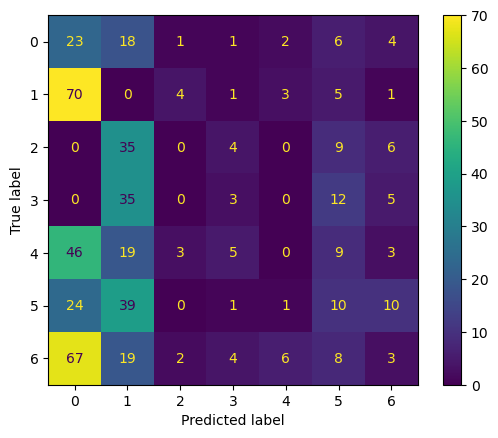

In [75]:
ConfusionMatrixDisplay.from_predictions(y_true, y_predicted)
plt.show()

In [76]:
X_test_scaled[y_true == y_predicted]

,0,1,2,3,4,5
85,1.052616,-0.512534,-0.264237,1.339860,-0.257065,-0.227102
100,1.052616,-0.641957,-0.264237,-0.303522,-0.257065,-0.227102
107,1.052616,0.264003,-0.264237,4.078830,-0.257065,-0.227102
139,1.052616,-1.159649,3.343349,-0.303522,-0.257065,-0.227102
147,1.052616,-1.418494,-0.264237,-0.303522,-0.257065,-0.227102
153,1.052616,1.169963,-0.264237,-0.303522,1.033155,-0.227102
156,1.052616,-0.641957,-0.264237,-0.303522,-0.257065,-0.227102
163,1.052616,0.264003,-0.264237,4.078830,-0.257065,-0.227102
224,-0.950014,-0.512534,-0.264237,2.435448,-0.257065,1.897442
225,-0.950014,0.781694,-0.264237,0.244272,-0.257065,-0.227102
